<a href="https://colab.research.google.com/github/SXV357/Inspirit-AI-Deep-Dive-Designing-DL-Systems-Notebooks/blob/main/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import gym
from IPython.display import HTML

import tqdm

ats = {1: "hit", 0:"stay"}

def play_blackjack(epsilon, print_steps=False):
  game = []
  state = blackjack.reset()
  game_over = False
  while game_over == False:
      if print_steps: 
        print("Your cards: ", blackjack.player)
        print_state(state)
      action = epsilon_greedy(state, epsilon)
      if print_steps: print(f"Agents chooses to {ats[action]}")
      next_state, reward, game_over, _ = blackjack.step(action)
      game.append((state, action))
      state = next_state
      if game_over:
        if print_steps:
          print("Your cards: ", blackjack.player)
          print_state(state)
          print("Game over!")
          print(f"Dealer has {blackjack.dealer}")
          print(rtm[reward])
        game.append(reward)    
  return game

def get_best_action(hand_val, dealer_card, usable_ace):
    state = (hand_val, dealer_card, usable_ace)

    # Compute Q(state, True)
    if num_games[(state,True)] == 0:
      Q_state_true = 0
    else:
      Q_state_true = sum_rewards[(state,True)] / num_games[(state,True)]
    
    # Compute Q(state, False)
    if num_games[(state,False)] == 0:
      Q_state_false = 0
    else:
      Q_state_false = sum_rewards[(state,False)] / num_games[(state,False)]

    return Q_state_true >= Q_state_false

def make_subplot(ax, usable_ace):
    x_coords = np.arange(1, 11) # dealer's cards
    y_coords = np.arange(11, 22) # gambler's hand values
    Z = np.array([[get_best_action(y, x, usable_ace) for x in x_coords] for y in y_coords])
    surf = ax.imshow(Z, cmap=plt.get_cmap('Set1', 2), extent=[0.5, 10.5, 21.5, 10.5])
    plt.xticks(x_coords)
    plt.yticks(y_coords)
    plt.gca().invert_yaxis()
    ax.set_xlabel('Dealer Showing')
    ax.set_ylabel('Player Sum')
    col1_patch = mpatches.Patch(color='darkgray', label='Hit')
    col2_patch = mpatches.Patch(color='red', label='Stick')
    plt.legend(handles=[col1_patch, col2_patch])

def plot_strategy():
  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(121)
  ax.set_title('Usable Ace')
  make_subplot(ax, True)
  ax = fig.add_subplot(122)
  ax.set_title('No Usable Ace')
  make_subplot(ax, False)
  plt.show()

def best_action(state):
  if num_games[(state,True)] == 0:
    Q_state_true = 0
  else:
    Q_state_true = sum_rewards[(state,True)] / num_games[(state,True)]
  
  # Compute Q(state, False)
  if num_games[(state,False)] == 0:
    Q_state_false = 0
  else:
    Q_state_false = sum_rewards[(state,False)] / num_games[(state,False)]

  return Q_state_true >= Q_state_false


def print_state(state):
  print()
  print("Hand value:", state[0])
  print("Dealer's card:", state[1])
  print("Useable ace?:", state[2])
  print("-----")

rtm = {0:"It's a tie!", -1: "You lose!", 1:"You win!"}
def play_human(blackjack):
  print()
  state = blackjack.reset()
  print("Your cards: ", blackjack.player)
  print("Hand value:", state[0])
  print("Dealer's card:", state[1])
  print("Useable ace?:", state[2])
  print("-----")

  while True:
    move = input('1 for hit 0 for stay: ') == '1'
    state, reward, game_over, _ = blackjack.step(move)
    print("Your cards: ", blackjack.player)
    print("Hand value:", state[0])
    print("Dealer's card:", state[1])
    print("Useable ace?:", state[2])
    print("-----")
    if game_over:
      print("Game over!")
      print(f"Dealer has {blackjack.dealer}")
      print(rtm[reward])
      break
  return reward

def play_n_times(blackjack, n):
  return np.mean([play_human(blackjack) for _ in range(n)])

sum_rewards = Counter()
num_games = Counter()

In [3]:
blackjack = gym.make('Blackjack-v0')
play_human(blackjack)


Your cards:  [4, 3]
Hand value: 7
Dealer's card: 5
Useable ace?: False
-----
1 for hit 0 for stay: 1
Your cards:  [4, 3, 5]
Hand value: 12
Dealer's card: 5
Useable ace?: False
-----
1 for hit 0 for stay: 1
Your cards:  [4, 3, 5, 10]
Hand value: 22
Dealer's card: 5
Useable ace?: False
-----
Game over!
Dealer has [5, 1]
You lose!


-1.0

In [5]:
q_traffic = {('red', 'go'):-1, ('green', 'go'):1, ("red", 'stop'):1, ('green', 'stop'):-0.5}
actions_traffic = ['go', 'stop']

actions_black_jack = ['hit', 'stay']
q_black_jack = {(21, 'hit'): -1, (21, 'stay'): 1}

# for every Q associated state and action(how good is decision)
# each tuple has state and action('red', 'go')


In [6]:
def q_policy_implementation(s, q):
  """
  s:       is the state
  q:       is a dictionary mapping tuples (s, a) to their value Q(s, a)
           i.e q[(s, a)] gets the value of (s, a).
  """
  best_action, best_value = None, -1000
  for (state, action), val in q.items():
    if val > best_value and state == s:
      best_value = val
      best_action = action
     
  print ("State:",s,"Best Action:",best_action)
  return (best_action)

In [7]:
q_policy_implementation('red', q_traffic)
q_policy_implementation(21, q_black_jack)

State: red Best Action: stop
State: 21 Best Action: stay


'stay'

In [8]:
def update_counters(game):
    reward = game[-1]
    for state_action_tuple in game[:-1]:
        sum_rewards[state_action_tuple] += reward
        num_games[state_action_tuple] += 1
    return sum_rewards, num_games

In [9]:
def epsilon_greedy(state, epsilon):

  # Return best_action with probability 1-epsilon
  if np.random.rand() > epsilon:
    return best_action(state)
  
  # Otherwise, return random action
  else:
    return np.random.choice([0,1])

In [10]:
epsilon = 0.15
sum_rewards = Counter()
num_games = Counter()

for iteration in tqdm.tqdm(range(1000000)):
  game = play_blackjack(epsilon)
  update_counters(game)


100%|██████████| 1000000/1000000 [02:24<00:00, 6939.69it/s]


In [11]:
# testing agent
play_blackjack(epsilon=0, print_steps=True)

Your cards:  [10, 10]

Hand value: 20
Dealer's card: 8
Useable ace?: False
-----
Agents chooses to stay
Your cards:  [10, 10]

Hand value: 20
Dealer's card: 8
Useable ace?: False
-----
Game over!
Dealer has [8, 10]
You win!


[((20, 8, False), False), 1.0]

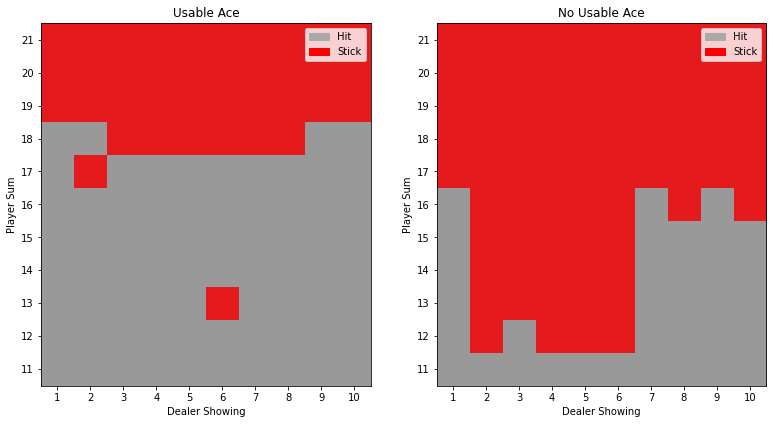

In [12]:
# strategy visualization
plot_strategy()